### Importing the libraries

In [25]:
import networkx as nx
import attack_functions as af
import matplotlib.pyplot as plt

# Part 1: Use small graphs to write the code

## First graph: Erdos-Renyi graph

Size of the Graph:  1000
Size of the Giant Component:  784


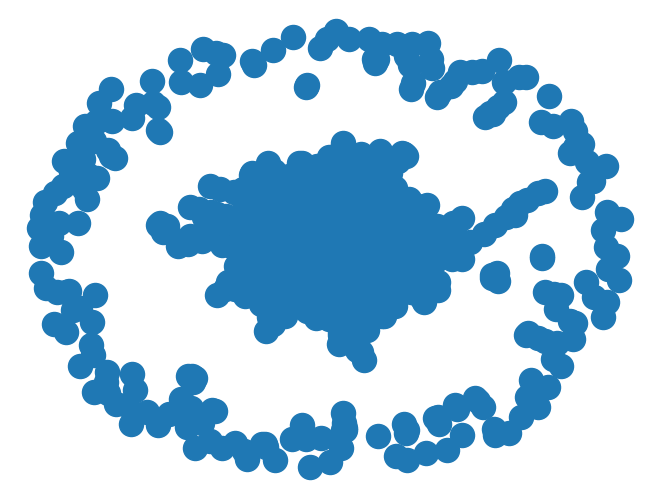

In [26]:
G_erdos_renyi = nx.erdos_renyi_graph(1000, 0.002)
G_erdos_renyi_nodes = list(G_erdos_renyi.nodes())
print("Size of the Graph: ", len(G_erdos_renyi_nodes))
G_erdos_renyi_nodes_giant = max(nx.connected_components(G_erdos_renyi), key=len)
print("Size of the Giant Component: ", len(G_erdos_renyi_nodes_giant))
nx.draw(G_erdos_renyi)

### Comparison among different attacks: random, highest degree, highest page rank, highest betweenness

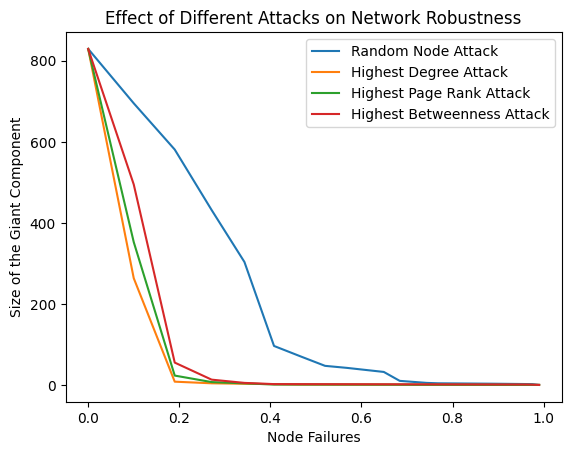

In [52]:
def perform_attacks(graph, attack_types):
    original_size = len(graph.nodes)
    initial_giant_component = max(nx.connected_components(graph), key=len)
    initial_giant_component_size = len(initial_giant_component)
    for attack_type in attack_types:
        results = {}
        results[initial_giant_component_size] = 0   
        current_graph = graph.copy()
        while len(current_graph.nodes) > 10:
            if attack_type == 'Random Node Attack':
                current_graph = af.remove_random_nodes_attack(current_graph, 0.1)
            elif attack_type == 'Highest Degree Attack':
                current_graph = af.remove_highest_degree_nodes_attack(current_graph, 0.1)
            elif attack_type == 'Highest Page Rank Attack':
                current_graph = af.remove_highest_page_rank_nodes_attack(current_graph, 0.1)
            elif attack_type == 'Highest Betweenness Attack':
                current_graph = af.remove_highest_betweenness_nodes_attack(current_graph, 0.1)
            
            giant_component = max(nx.connected_components(current_graph), key=len)
            giant_component_size = len(giant_component)
            nodes_failure_percentage = (original_size -len(current_graph.nodes)) / original_size
            
            results[giant_component_size] = nodes_failure_percentage
         
        plt.plot(list(results.values()), list(results.keys()), label=attack_type)
    
    plt.xlabel('Node Failures')
    plt.ylabel('Size of the Giant Component')
    plt.title('Effect of Different Attacks on Network Robustness')
    plt.legend()
    plt.show()

G = nx.erdos_renyi_graph(1000, 0.002)
giant_component = max(nx.connected_components(G), key=len)
giant_component_size = len(giant_component)
attack_types = ['Random Node Attack', 'Highest Degree Attack', 'Highest Page Rank Attack', 'Highest Betweenness Attack']
perform_attacks(G, attack_types)

## Second graph: Barabasi-Albert graph

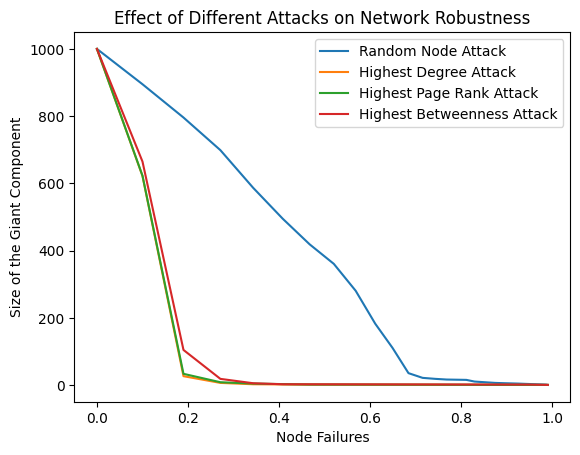

In [53]:
def perform_attacks(graph, attack_types):
    original_size = len(graph.nodes)
    initial_giant_component = max(nx.connected_components(graph), key=len)
    initial_giant_component_size = len(initial_giant_component)
    for attack_type in attack_types:
        results = {}
        results[initial_giant_component_size] = 0   
        current_graph = graph.copy()
        while len(current_graph.nodes) > 10:
            if attack_type == 'Random Node Attack':
                current_graph = af.remove_random_nodes_attack(current_graph, 0.1)
            elif attack_type == 'Highest Degree Attack':
                current_graph = af.remove_highest_degree_nodes_attack(current_graph, 0.1)
            elif attack_type == 'Highest Page Rank Attack':
                current_graph = af.remove_highest_page_rank_nodes_attack(current_graph, 0.1)
            elif attack_type == 'Highest Betweenness Attack':
                current_graph = af.remove_highest_betweenness_nodes_attack(current_graph, 0.1)
            
            giant_component = max(nx.connected_components(current_graph), key=len)
            giant_component_size = len(giant_component)
            nodes_failure_percentage = (original_size -len(current_graph.nodes)) / original_size
            
            results[giant_component_size] = nodes_failure_percentage
         
        plt.plot(list(results.values()), list(results.keys()), label=attack_type)
    
    plt.xlabel('Node Failures')
    plt.ylabel('Size of the Giant Component')
    plt.title('Effect of Different Attacks on Network Robustness')
    plt.legend()
    plt.show()

G = nx.barabasi_albert_graph(1000, 2)
giant_component = max(nx.connected_components(G), key=len)
giant_component_size = len(giant_component)
attack_types = ['Random Node Attack', 'Highest Degree Attack', 'Highest Page Rank Attack', 'Highest Betweenness Attack']
perform_attacks(G, attack_types)

### Comparison among different attacks: random, highest degree, highest page rank, highest betweenness

In [ ]:
results_random_node_attack = {}
graph = G_barabasi_albert.copy()

while True:
    graph = af.remove_random_nodes_attack(graph, 0.1)

    giant_component = max(nx.connected_components(graph), key=len)
    giant_component_size = len(giant_component)

    nodes_failure_percentage = (len(graph.nodes) - giant_component_size) / len(graph.nodes)

    results_random_node_attack[giant_component_size] = nodes_failure_percentage

    if giant_component_size < 3:
        break

results_highest_degree_node_attack = {}
graph = G_barabasi_albert.copy()

while True:
    graph = af.remove_highest_degree_nodes_attack(graph, 0.1)

    giant_component = max(nx.connected_components(graph), key=len)
    giant_component_size = len(giant_component)

    nodes_failure_percentage = (len(graph.nodes) - giant_component_size) / len(graph.nodes)

    results_highest_degree_node_attack[giant_component_size] = nodes_failure_percentage

    if giant_component_size < 3:
        break

results_highest_page_rank_attack = {}
graph = G_barabasi_albert.copy()

while True:
    graph = af.remove_highest_page_rank_nodes_attack(graph, 0.1)

    giant_component = max(nx.connected_components(graph), key=len)
    giant_component_size = len(giant_component)

    nodes_failure_percentage = (len(graph.nodes) - giant_component_size) / len(graph.nodes)

    results_highest_page_rank_attack[giant_component_size] = nodes_failure_percentage

    if giant_component_size < 3:
        break

results_highest_betweenness_attack = {}
graph = G_barabasi_albert.copy()

while True:
    graph = af.remove_highest_betweenness_nodes_attack(graph, 0.1)

    giant_component = max(nx.connected_components(graph), key=len)
    giant_component_size = len(giant_component)

    nodes_failure_percentage = (len(graph.nodes) - giant_component_size) / len(graph.nodes)

    results_highest_betweenness_attack[giant_component_size] = nodes_failure_percentage

    if giant_component_size < 3:
        break

# comparing the results of the attacks on a plot

plt.plot(list(results_random_node_attack.values()), list(results_random_node_attack.keys()), color='black', linestyle='solid',label='Results 1')
plt.plot(list(results_highest_degree_node_attack.values()), list(results_highest_degree_node_attack.keys()), color='red', linestyle='dashdot',label='Results 2')
plt.plot(list(results_highest_page_rank_attack.values()), list(results_highest_page_rank_attack.keys()), color='blue', linestyle='dashed',label='Results 3')
plt.plot(list(results_highest_betweenness_attack.values()), list(results_highest_betweenness_attack.keys()), color='green', linestyle='dotted', label='Results 4')

plt.xlabel('Percentage of nodes failure')
plt.ylabel('Size of the Giant Component')
plt.title('Comparison of Four types of attacks on Barabasi-Albert graph')
plt.legend()

plt.show()

# Part 2: Use the large graph of the other assignments

In [ ]:
my_graph = nx.read_edgelist("../data/dataset.txt", create_using=nx.Graph(), nodetype=int)

results_random_node_attack = {}
graph = my_graph.copy()

while True:
    graph = af.remove_random_nodes_attack(graph, 0.1)

    giant_component = max(nx.connected_components(graph), key=len)
    giant_component_size = len(giant_component)

    nodes_failure_percentage = (len(graph.nodes) - giant_component_size) / len(graph.nodes)

    results_random_node_attack[giant_component_size] = nodes_failure_percentage

    if giant_component_size < 3:
        break

results_highest_degree_node_attack = {}
graph = my_graph.copy()

while True:
    graph = af.remove_highest_degree_nodes_attack(graph, 0.1)

    giant_component = max(nx.connected_components(graph), key=len)
    giant_component_size = len(giant_component)

    nodes_failure_percentage = (len(graph.nodes) - giant_component_size) / len(graph.nodes)

    results_highest_degree_node_attack[giant_component_size] = nodes_failure_percentage

    if giant_component_size < 3:
        break

results_highest_page_rank_attack = {}
graph = my_graph.copy()

while True:
    graph = af.remove_highest_page_rank_nodes_attack(graph, 0.1)

    giant_component = max(nx.connected_components(graph), key=len)
    giant_component_size = len(giant_component)

    nodes_failure_percentage = (len(graph.nodes) - giant_component_size) / len(graph.nodes)

    results_highest_page_rank_attack[giant_component_size] = nodes_failure_percentage

    if giant_component_size < 3:
        break

results_highest_betweenness_attack = {}
graph = my_graph.copy()

while True:
    graph = af.remove_highest_betweenness_nodes_attack(graph, 0.1)

    giant_component = max(nx.connected_components(graph), key=len)
    giant_component_size = len(giant_component)

    nodes_failure_percentage = (len(graph.nodes) - giant_component_size) / len(graph.nodes)

    results_highest_betweenness_attack[giant_component_size] = nodes_failure_percentage

    if giant_component_size < 3:
        break

# comparing the results of the attacks on a plot

plt.plot(list(results_random_node_attack.values()), list(results_random_node_attack.keys()), color='black', linestyle='solid',label='Results 1')
plt.plot(list(results_highest_degree_node_attack.values()), list(results_highest_degree_node_attack.keys()), color='red', linestyle='dashdot',label='Results 2')
plt.plot(list(results_highest_page_rank_attack.values()), list(results_highest_page_rank_attack.keys()), color='blue', linestyle='dashed',label='Results 3')
plt.plot(list(results_highest_betweenness_attack.values()), list(results_highest_betweenness_attack.keys()), color='green', linestyle='dotted', label='Results 4')

plt.xlabel('Percentage of nodes failure')
plt.ylabel('Size of the Giant Component')
plt.title('Comparison of Four types of attacks on Twitter\'s Circle graph')
plt.legend()

plt.show()

# Part 3: Building robustness